In [5]:
import os

os.makedirs("docs", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("outputs/visuals", exist_ok=True)

print("✅ Folders created: docs/, data/processed/, outputs/visuals/")


✅ Folders created: docs/, data/processed/, outputs/visuals/


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
RAW_CSV = "data/raw/customer_support_tickets.csv"  # keep your csv in same folder as notebook

df = pd.read_csv(RAW_CSV)
print("✅ Loaded:", df.shape)
df.head()


✅ Loaded: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [8]:
# Schema
schema = pd.DataFrame({
    "Column": df.columns,
    "dtype": df.dtypes.astype(str),
    "missing_values": df.isna().sum().values,
    "missing_%": (df.isna().mean() * 100).round(2).values
}).sort_values("missing_values", ascending=False)

schema
schema.to_csv("docs/schema_missing_report.csv", index=False)
print("✅ Saved: docs/schema_missing_report.csv")


✅ Saved: docs/schema_missing_report.csv


In [9]:
def safe_counts(col):
    if col in df.columns:
        return df[col].astype(str).value_counts().head(20)
    return f"Column '{col}' not found"

print("Ticket Type:\n", safe_counts("Ticket Type"), "\n")
print("Ticket Priority:\n", safe_counts("Ticket Priority"), "\n")
print("Product Purchased (Category):\n", safe_counts("Product Purchased"), "\n")
print("Ticket Status:\n", safe_counts("Ticket Status"), "\n")
with open("docs/initial_kpi_snapshot.txt", "w", encoding="utf-8") as f:
    f.write("Initial KPI Snapshot\n\n")
    for col in ["Ticket Type","Ticket Priority","Product Purchased","Ticket Status"]:
        f.write(f"\n--- {col} ---\n")
        if col in df.columns:
            f.write(df[col].astype(str).value_counts().to_string())
        else:
            f.write("NOT FOUND")
print("✅ Saved: docs/initial_kpi_snapshot.txt")


Ticket Type:
 Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64 

Ticket Priority:
 Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64 

Product Purchased (Category):
 Product Purchased
Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Amazon Echo                       221
Philips Hue Lights                221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
LG Washing Machine                208
Garmin Forerunner                 208
Canon DSLR Camera                 206
Nikon D                           204
Nintendo Switc

In [10]:
df_clean = df.drop_duplicates().copy()

# clean column names
df_clean.columns = [c.strip() for c in df_clean.columns]

# strip text fields
for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()
    df_clean[col] = df_clean[col].replace("nan", np.nan)

# fill important missing text columns
for col in ["Ticket Type", "Ticket Priority", "Product Purchased", "Ticket Status"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown")

print("✅ Clean done:", df_clean.shape)
df_clean.head()


✅ Clean done: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [11]:
priority_map = {"critical": 4, "high": 3, "medium": 2, "low": 1}

if "Ticket Priority" in df_clean.columns:
    df_clean["Priority_Score"] = (
        df_clean["Ticket Priority"].astype(str).str.lower().map(priority_map).fillna(0).astype(int)
    )
else:
    print("Ticket Priority column missing; Priority_Score not created.")
for col in ["First Response Time", "Time to Resolution"]:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors="coerce")

if "First Response Time" in df_clean.columns and "Time to Resolution" in df_clean.columns:
    df_clean["Resolution_Duration_Hours"] = (
        (df_clean["Time to Resolution"] - df_clean["First Response Time"]).dt.total_seconds() / 3600
    )
else:
    print("Time columns missing; Resolution_Duration_Hours not created.")
    
df_clean[["Ticket Priority","Priority_Score","Resolution_Duration_Hours"]].head(10)


,Ticket Priority,Priority_Score,Resolution_Duration_Hours
0,Critical,4,NaN
1,Critical,4,NaN
2,Low,1,6.850000
3,Low,1,-5.533333
4,Low,1,19.683333
5,Low,1,NaN
6,Critical,4,NaN
7,Critical,4,NaN
8,Low,1,NaN
9,Critical,4,NaN


In [12]:
clean_path = "data/processed/cleaned_tickets.csv"
df_clean.to_csv(clean_path, index=False)
print("✅ Saved cleaned dataset:", clean_path)


✅ Saved cleaned dataset: data/processed/cleaned_tickets.csv


In [13]:
# Data dictionary
dd = pd.DataFrame({"Column": df_clean.columns, "dtype": df_clean.dtypes.astype(str)})
dd.to_csv("docs/data_dictionary.csv", index=False)

# Feature summary
with open("docs/feature_engineering_summary.md", "w", encoding="utf-8") as f:
    f.write("# Feature Engineering Summary (Milestone 1)\n\n")
    f.write("## Cleaning\n")
    f.write("- Dropped duplicates\n")
    f.write("- Stripped whitespace in text columns\n")
    f.write("- Filled missing values for key text fields with 'Unknown'\n\n")
    f.write("## New Features\n")
    f.write("- Priority_Score: Critical=4, High=3, Medium=2, Low=1\n")
    f.write("- Resolution_Duration_Hours: (Time to Resolution - First Response Time) in hours\n")

print("✅ Saved docs: docs/data_dictionary.csv, docs/feature_engineering_summary.md")


✅ Saved docs: docs/data_dictionary.csv, docs/feature_engineering_summary.md


In [14]:
df_viz = pd.read_csv("data/processed/cleaned_tickets.csv")
print(df_viz.shape)


(8469, 19)


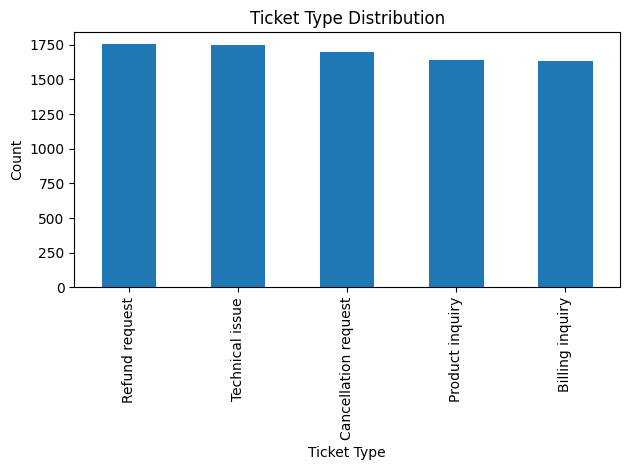

In [15]:
type_counts = df_viz["Ticket Type"].value_counts()
type_counts.plot(kind="bar")
plt.title("Ticket Type Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/visuals/ticket_type_distribution.png", dpi=200)
plt.show()


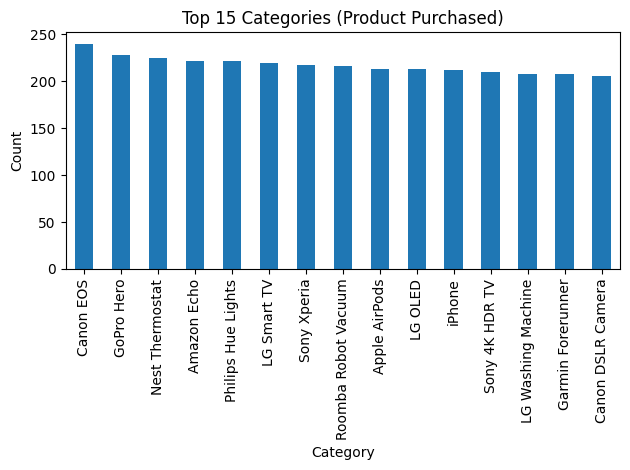

In [16]:
top_cats = df_viz["Product Purchased"].value_counts().head(15)
top_cats.plot(kind="bar")
plt.title("Top 15 Categories (Product Purchased)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/visuals/top_categories.png", dpi=200)
plt.show()


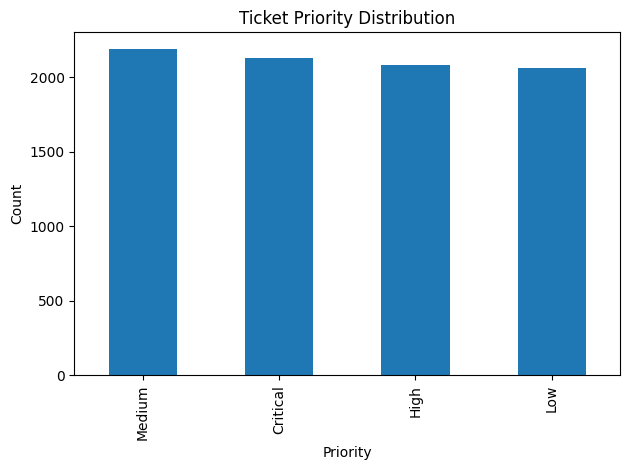

In [17]:
priority_counts = df_viz["Ticket Priority"].value_counts()
priority_counts.plot(kind="bar")
plt.title("Ticket Priority Distribution")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/visuals/priority_distribution.png", dpi=200)
plt.show()


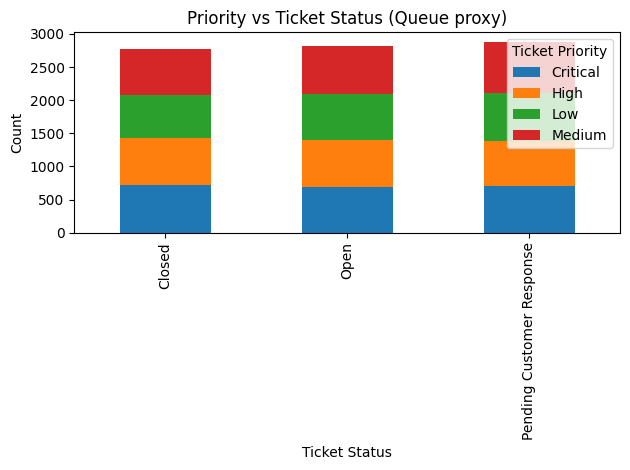

In [18]:
pt = pd.crosstab(df_viz["Ticket Status"], df_viz["Ticket Priority"])
pt.plot(kind="bar", stacked=True)
plt.title("Priority vs Ticket Status (Queue proxy)")
plt.xlabel("Ticket Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/visuals/priority_vs_status.png", dpi=200)
plt.show()


In [19]:
with open("docs/week3_module3_summary.md", "w", encoding="utf-8") as f:
    f.write("# Week 3 – Module 3: Exploratory Visualization\n\n")
    f.write("## Outputs\n")
    f.write("- outputs/visuals/ticket_type_distribution.png\n")
    f.write("- outputs/visuals/top_categories.png\n")
    f.write("- outputs/visuals/priority_distribution.png\n")
    f.write("- outputs/visuals/priority_vs_status.png\n\n")
    f.write("## Notes\n")
    f.write("- Ticket Status used as a queue/progress proxy (Open/Pending/Closed).\n")
print("✅ Saved: docs/week3_module3_summary.md")


✅ Saved: docs/week3_module3_summary.md


In [20]:
import sys
!{sys.executable} -m pip install -q scikit-learn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Option A (recommended)
PATH = "data/processed/cleaned_tickets.csv"

# Option B (if you saved differently)
# PATH = "customer_support_tickets.csv"

df = pd.read_csv(PATH)
print("Loaded:", df.shape)
df.head()


Loaded: (8469, 19)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration_Hours
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,4,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,4,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1,6.850000
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,1,-5.533333
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1,19.683333


In [22]:
print("Columns:", df.columns.tolist())

possible_text_cols = [
    "Ticket Subject", "Ticket Description", "Customer Complaint",
    "Issue Description", "Issue", "Subject", "Description", "Complaint"
]

text_col = next((c for c in possible_text_cols if c in df.columns), None)

if text_col is None:
    # fallback: try any object column with long text
    obj_cols = df.select_dtypes(include="object").columns.tolist()
    lengths = {c: df[c].dropna().astype(str).str.len().mean() for c in obj_cols}
    text_col = max(lengths, key=lengths.get) if lengths else None

print("✅ Using text column:", text_col)
df[text_col].head(3)


Columns: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'Priority_Score', 'Resolution_Duration_Hours']
✅ Using text column: Ticket Subject


0               Product setup
1    Peripheral compatibility
2             Network problem
Name: Ticket Subject, dtype: object

In [23]:
df[text_col] = df[text_col].astype(str).fillna("").str.strip()
df["issue_text"] = df[text_col].replace("nan", "").fillna("")

# remove empty rows for clustering
df_m4 = df[df["issue_text"].str.len() > 3].copy()
print("Rows used for clustering:", df_m4.shape)


Rows used for clustering: (8469, 20)


In [24]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df_m4["issue_text"])
X.shape


(8469, 41)

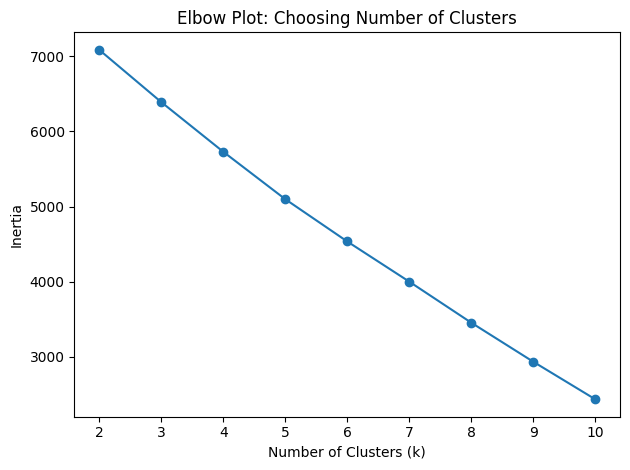

In [25]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Plot: Choosing Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()


In [26]:
k = 6  # change if you want

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_m4["cluster"] = kmeans.fit_predict(X)

df_m4["cluster"].value_counts().sort_index()


cluster
0    2568
1    1613
2    1551
3    1100
4     574
5    1063
Name: count, dtype: int64

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def avg_cluster_similarity(X_cluster):
    # if too small, similarity not meaningful
    n = X_cluster.shape[0]
    if n < 2:
        return np.nan
    
    S = cosine_similarity(X_cluster)
    # average of upper triangle (excluding diagonal)
    tri = S[np.triu_indices(n, k=1)]
    return float(np.mean(tri)) if len(tri) else np.nan


In [28]:
cluster_sim = []
for c in sorted(df_m4["cluster"].unique()):
    idx = df_m4.index[df_m4["cluster"] == c]
    Xc = X[df_m4.index.get_indexer(idx)]
    cluster_sim.append((c, len(idx), avg_cluster_similarity(Xc)))

sim_df = pd.DataFrame(cluster_sim, columns=["cluster", "cluster_size", "avg_similarity"])
sim_df.sort_values("avg_similarity", ascending=False)


,cluster,cluster_size,avg_similarity
4,4,574,1.000000
5,5,1063,0.627067
3,3,1100,0.624351
1,1,1613,0.473219
2,2,1551,0.468294
0,0,2568,0.199979


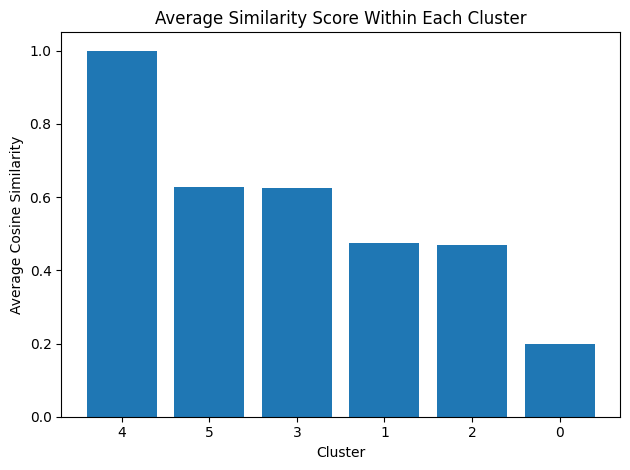

In [29]:
sim_df_sorted = sim_df.sort_values("avg_similarity", ascending=False)

plt.bar(sim_df_sorted["cluster"].astype(str), sim_df_sorted["avg_similarity"])
plt.title("Average Similarity Score Within Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Cosine Similarity")
plt.tight_layout()
plt.show()


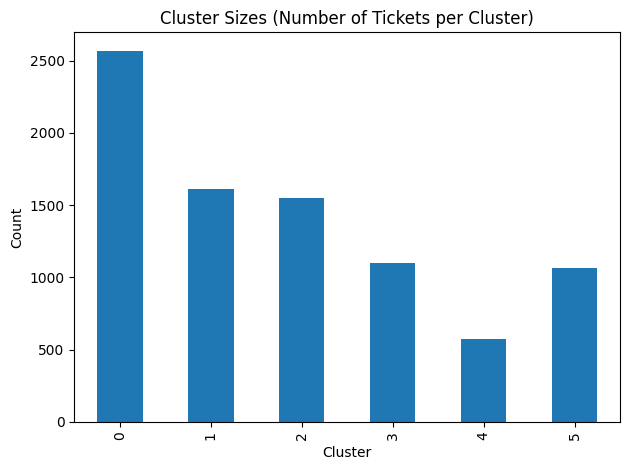

In [30]:
cluster_sizes = df_m4["cluster"].value_counts().sort_index()

cluster_sizes.plot(kind="bar")
plt.title("Cluster Sizes (Number of Tickets per Cluster)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


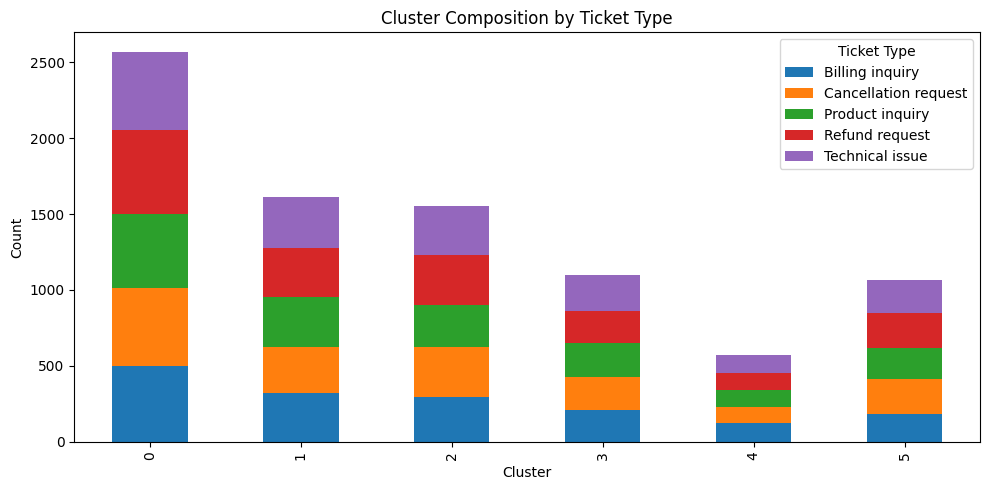

In [31]:
if "Ticket Type" in df_m4.columns:
    ct = pd.crosstab(df_m4["cluster"], df_m4["Ticket Type"])
    ct.plot(kind="bar", stacked=True, figsize=(10,5))
    plt.title("Cluster Composition by Ticket Type")
    plt.xlabel("Cluster")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Ticket Type column not found in dataset.")


C:\Users\91955\AppData\Local\Temp\ipykernel_9004\1546661858.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in sorted(df_m4["cluster"].unique())])


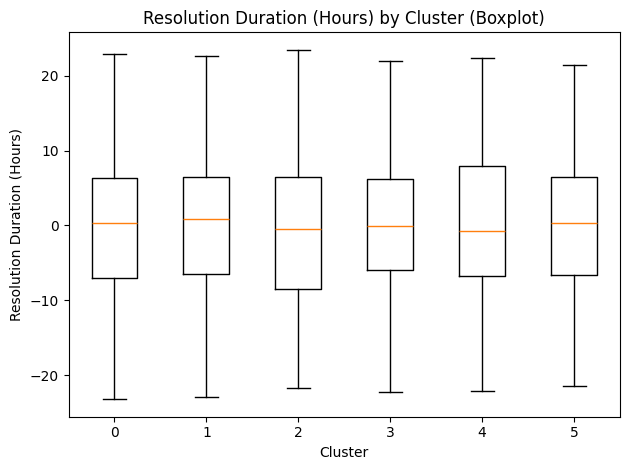

In [32]:
if "Resolution_Duration_Hours" in df_m4.columns:
    data = [df_m4[df_m4["cluster"] == c]["Resolution_Duration_Hours"].dropna() for c in sorted(df_m4["cluster"].unique())]
    plt.boxplot(data, labels=[str(c) for c in sorted(df_m4["cluster"].unique())])
    plt.title("Resolution Duration (Hours) by Cluster (Boxplot)")
    plt.xlabel("Cluster")
    plt.ylabel("Resolution Duration (Hours)")
    plt.tight_layout()
    plt.show()
else:
    print("Resolution_Duration_Hours not found. Compute it in Milestone 1 first.")


C:\Users\91955\AppData\Local\Temp\ipykernel_9004\1874634411.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in sorted(df_m4["cluster"].unique())])


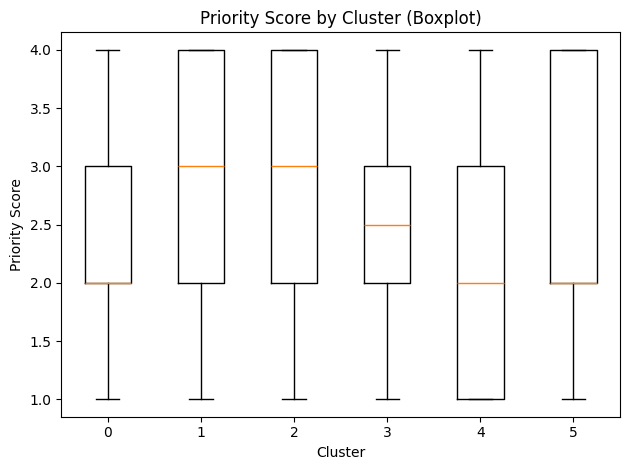

In [33]:
if "Priority_Score" in df_m4.columns:
    data = [df_m4[df_m4["cluster"] == c]["Priority_Score"].dropna() for c in sorted(df_m4["cluster"].unique())]
    plt.boxplot(data, labels=[str(c) for c in sorted(df_m4["cluster"].unique())])
    plt.title("Priority Score by Cluster (Boxplot)")
    plt.xlabel("Cluster")
    plt.ylabel("Priority Score")
    plt.tight_layout()
    plt.show()
else:
    print("Priority_Score not found. Compute it in Milestone 1 first.")


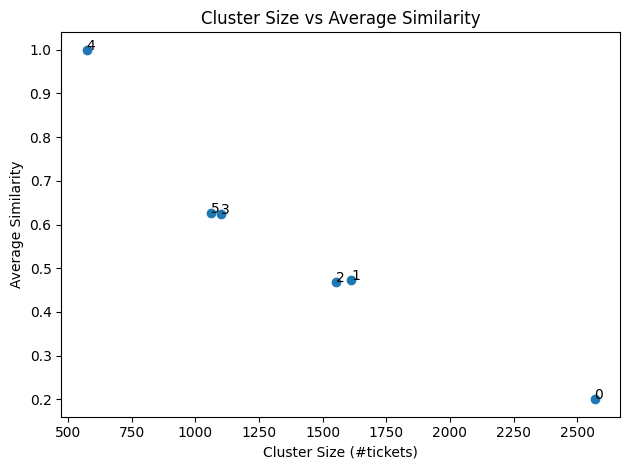

In [34]:
plt.scatter(sim_df["cluster_size"], sim_df["avg_similarity"])
for _, r in sim_df.iterrows():
    plt.text(r["cluster_size"], r["avg_similarity"], str(int(r["cluster"])))

plt.title("Cluster Size vs Average Similarity")
plt.xlabel("Cluster Size (#tickets)")
plt.ylabel("Average Similarity")
plt.tight_layout()
plt.show()


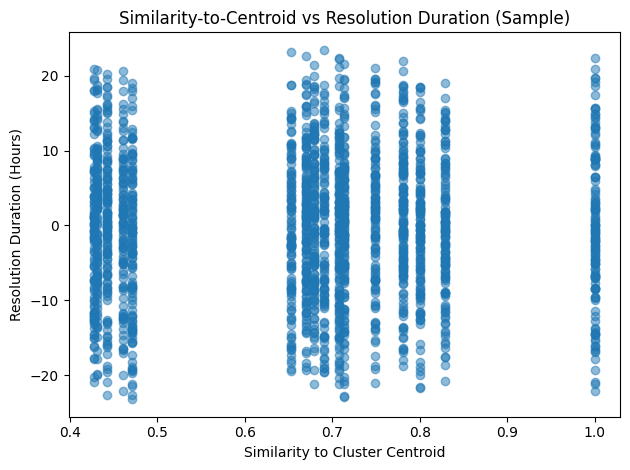

In [35]:
# centroid vectors in TF-IDF space
centroids = kmeans.cluster_centers_

# similarity of each ticket to its assigned cluster centroid
# (cosine similarity between ticket tfidf and centroid)
from sklearn.preprocessing import normalize

X_norm = normalize(X)
cent_norm = normalize(centroids)

assigned = df_m4["cluster"].values
sim_to_centroid = np.sum(X_norm.multiply(cent_norm[assigned]).toarray(), axis=1)

df_m4["sim_to_centroid"] = sim_to_centroid

if "Resolution_Duration_Hours" in df_m4.columns:
    sample = df_m4.dropna(subset=["Resolution_Duration_Hours"]).sample(min(2000, len(df_m4)), random_state=42)
    plt.scatter(sample["sim_to_centroid"], sample["Resolution_Duration_Hours"], alpha=0.5)
    plt.title("Similarity-to-Centroid vs Resolution Duration (Sample)")
    plt.xlabel("Similarity to Cluster Centroid")
    plt.ylabel("Resolution Duration (Hours)")
    plt.tight_layout()
    plt.show()
else:
    print("Resolution_Duration_Hours not found.")


In [36]:
summary = []

for c in sorted(df_m4["cluster"].unique()):
    sub = df_m4[df_m4["cluster"] == c]
    size = len(sub)
    avg_sim = float(sim_df[sim_df["cluster"] == c]["avg_similarity"].values[0])
    
    med_res = sub["Resolution_Duration_Hours"].median() if "Resolution_Duration_Hours" in sub.columns else np.nan
    high_pri = np.mean(sub["Priority_Score"] >= 3) if "Priority_Score" in sub.columns else np.nan
    
    summary.append([c, size, avg_sim, med_res, high_pri])

summary_df = pd.DataFrame(summary, columns=[
    "cluster","size","avg_similarity","median_resolution_hours","high_priority_ratio"
]).sort_values(["median_resolution_hours","high_priority_ratio"], ascending=[False, False])

summary_df


,cluster,size,avg_similarity,median_resolution_hours,high_priority_ratio
1,1,1613,0.473219,0.791667,0.510229
5,5,1063,0.627067,0.308333,0.494826
0,0,2568,0.199979,0.266667,0.493769
3,3,1100,0.624351,-0.083333,0.500000
2,2,1551,0.468294,-0.425000,0.508704
4,4,574,1.000000,-0.750000,0.449477


In [37]:
os.makedirs("outputs/module4", exist_ok=True)
summary_df.to_csv("outputs/module4/cluster_summary.csv", index=False)
sim_df.to_csv("outputs/module4/cluster_similarity.csv", index=False)

with open("docs/module4_similarity_cluster_insights.md", "w", encoding="utf-8") as f:
    f.write("# Module 4: Similarity and Cluster Insights\n\n")
    f.write("## What was done\n")
    f.write(f"- Text column used for clustering: `{text_col}`\n")
    f.write(f"- Vectorization: TF-IDF (1-2 grams), max_features=5000\n")
    f.write(f"- Clustering: KMeans with k={k}\n\n")
    f.write("## Key outputs\n")
    f.write("- Average similarity within each cluster\n")
    f.write("- Cluster size vs issue type composition\n")
    f.write("- Performance gaps (resolution duration + priority) across clusters\n\n")
    f.write("## Problem clusters (candidates)\n")
    f.write("Clusters with high median resolution time and/or high-priority ratio are flagged.\n\n")
    f.write(summary_df.head(10).to_string(index=False))
    f.write("\n")

print("✅ Saved: outputs/module4/*.csv and docs/module4_similarity_cluster_insights.md")


✅ Saved: outputs/module4/*.csv and docs/module4_similarity_cluster_insights.md


In [38]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
# Update path if needed
PATH = "data/processed/cleaned_tickets.csv"

df = pd.read_csv(PATH)

print("Dataset loaded successfully")
print("Shape:", df.shape)


Dataset loaded successfully
Shape: (8469, 19)


In [40]:
print("Available columns:")
df.columns.tolist()


Available columns:


['Ticket ID',
 'Customer Name',
 'Customer Email',
 'Customer Age',
 'Customer Gender',
 'Product Purchased',
 'Date of Purchase',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Description',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel',
 'First Response Time',
 'Time to Resolution',
 'Customer Satisfaction Rating',
 'Priority_Score',
 'Resolution_Duration_Hours']

In [41]:
# Create Resolution Time column (in hours)
df["Resolution Time"] = df["Resolution_Duration_Hours"]

df[["Resolution Time"]].head()


,Resolution Time
0,NaN
1,NaN
2,6.850000
3,-5.533333
4,19.683333


In [42]:
print("Missing values:", df["Resolution Time"].isna().sum())
print("Negative values:", (df["Resolution Time"] < 0).sum())


Missing values: 5700
Negative values: 1365


In [43]:
avg_resolution_overall = df["Resolution Time"].mean()

print(f"Average Resolution Time (entire dataset): {avg_resolution_overall:.2f} hours")


Average Resolution Time (entire dataset): -0.06 hours


In [44]:
ticket_type_col = "Ticket Type"   # change ONLY if your dataset uses a different name

df[ticket_type_col].value_counts()


Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [45]:
avg_resolution_by_type = (
    df.groupby(ticket_type_col)["Resolution Time"]
      .mean()
      .sort_values(ascending=False)
)

avg_resolution_by_type


Ticket Type
Refund request          0.218037
Technical issue         0.066466
Cancellation request   -0.165924
Billing inquiry        -0.207813
Product inquiry        -0.243183
Name: Resolution Time, dtype: float64

In [46]:
avg_resolution_by_type_df = avg_resolution_by_type.reset_index()
avg_resolution_by_type_df.columns = ["Ticket Type", "Average Resolution Time (hours)"]

avg_resolution_by_type_df


,Ticket Type,Average Resolution Time (hours)
0,Refund request,0.218037
1,Technical issue,0.066466
2,Cancellation request,-0.165924
3,Billing inquiry,-0.207813
4,Product inquiry,-0.243183


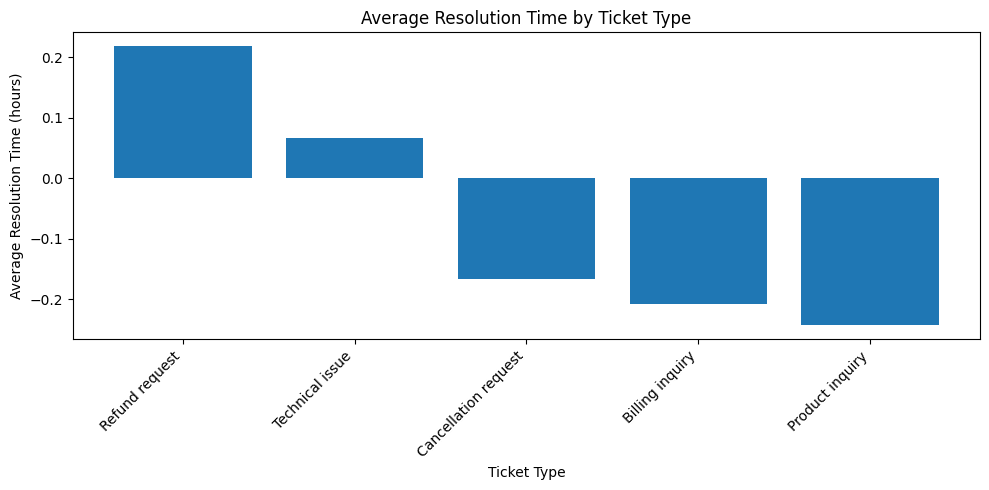

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    avg_resolution_by_type_df["Ticket Type"],
    avg_resolution_by_type_df["Average Resolution Time (hours)"]
)

plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (hours)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


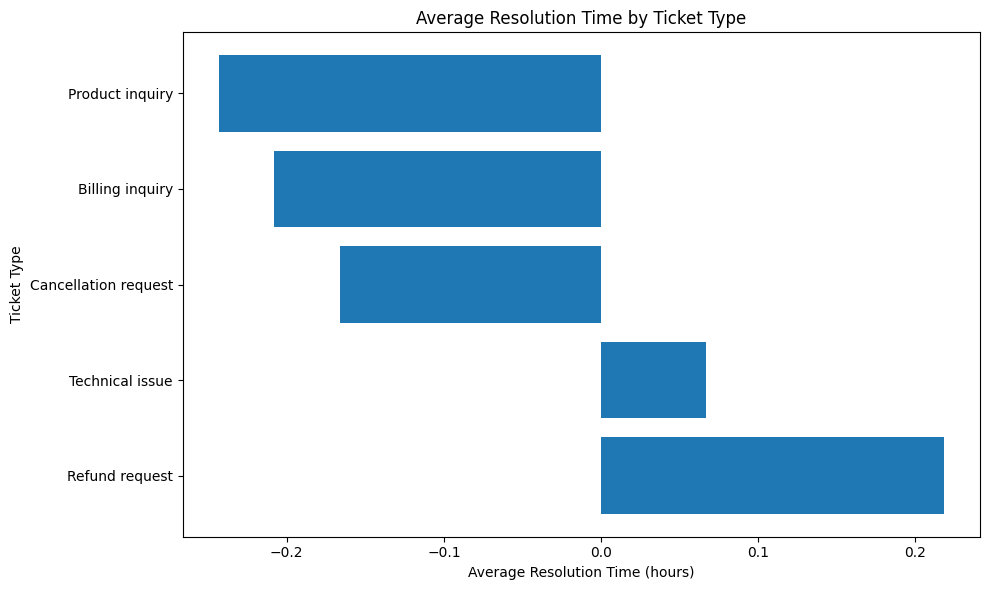

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(
    avg_resolution_by_type_df["Ticket Type"],
    avg_resolution_by_type_df["Average Resolution Time (hours)"]
)

plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Average Resolution Time (hours)")
plt.ylabel("Ticket Type")
plt.tight_layout()
plt.show()


In [49]:
print("SUMMARY")
print("-------")
print(f"Overall Average Resolution Time: {avg_resolution_overall:.2f} hours\n")
print("Average Resolution Time by Ticket Type:")
display(avg_resolution_by_type_df)


SUMMARY
-------
Overall Average Resolution Time: -0.06 hours

Average Resolution Time by Ticket Type:


,Ticket Type,Average Resolution Time (hours)
0,Refund request,0.218037
1,Technical issue,0.066466
2,Cancellation request,-0.165924
3,Billing inquiry,-0.207813
4,Product inquiry,-0.243183


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

PATH = "data/processed/cleaned_tickets.csv"
df = pd.read_csv(PATH)

os.makedirs("outputs", exist_ok=True)
os.makedirs("outputs/visuals", exist_ok=True)

print("✅ Loaded:", df.shape)
df.head()


✅ Loaded: (8469, 19)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration_Hours
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,4,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,4,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1,6.850000
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,1,-5.533333
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1,19.683333


In [51]:
# --- Day 2–Day 4 configuration (single place) ---
PATH = "data/processed/cleaned_tickets.csv"
priority_col = "Ticket Priority"
type_col = "Ticket Type"
res_col = "Resolution Time"
status_col = "Ticket Status"
trend_freq = "M"   # "M" monthly or "W" weekly
top_n = 10

# Ensure resolution time column exists
if res_col not in df.columns and "Resolution_Duration_Hours" in df.columns:
    df[res_col] = df["Resolution_Duration_Hours"]

# For resolution-time analytics we use rows with non-negative res_col where needed (see helpers).

print("✅ Columns check:")
print("Priority column found:", priority_col in df.columns)
print("Ticket Type column found:", type_col in df.columns)
print("Resolution Time column found:", res_col in df.columns)
print("Status column found:", status_col in df.columns)

show_cols = [c for c in [priority_col, type_col, res_col] if c in df.columns]
df[show_cols].head() if show_cols else df.head()


✅ Columns check:
Priority column found: True
Ticket Type column found: True
Resolution Time column found: True
Status column found: True


,Ticket Priority,Ticket Type,Resolution Time
0,Critical,Technical issue,NaN
1,Critical,Technical issue,NaN
2,Low,Technical issue,6.850000
3,Low,Billing inquiry,-5.533333
4,Low,Billing inquiry,19.683333


In [52]:
# --- Helper utilities for safe column detection and plotting ---

def pick_column(df, preferred_list, contains_keywords=None):
    """Pick first column from preferred_list (exact match) or first containing any of contains_keywords."""
    cols = [c for c in df.columns if c in preferred_list]
    if cols:
        return cols[0]
    if contains_keywords:
        for kw in contains_keywords:
            for c in df.columns:
                if kw.lower() in c.lower():
                    return c
    return None

def normalize_text_series(s):
    """Normalize text: strip and title case."""
    return s.astype(str).str.strip().str.title()

def safe_group_mean(df, group_col, value_col):
    """Group by group_col, mean of value_col. Returns empty DataFrame if columns missing. Uses non-negative value_col only."""
    if group_col not in df.columns or value_col not in df.columns:
        print(f"⚠ Skipping: missing column '{group_col}' or '{value_col}'")
        return pd.DataFrame()
    work = df[[group_col, value_col]].dropna()
    if pd.api.types.is_numeric_dtype(work[value_col]):
        work = work[work[value_col] >= 0]
    if work.empty:
        return pd.DataFrame()
    out = work.groupby(group_col)[value_col].mean().reset_index()
    return out

In [53]:
# Normalize priority and ticket type (consistent casing)
df[priority_col] = normalize_text_series(df[priority_col])
if type_col in df.columns:
    df[type_col] = normalize_text_series(df[type_col])

# For main report use High/Medium/Low; Critical kept in df but mapped to High for "high-priority" view
valid_priorities = ["High", "Medium", "Low"]
df_pri = df[df[priority_col].isin(valid_priorities)].copy()

# Working subset with non-negative resolution time for resolution-time analytics
df_res = df[(df[res_col].notna()) & (df[res_col] >= 0)].copy() if res_col in df.columns else df.copy()

print("✅ Priorities in df_pri:", sorted(df_pri[priority_col].unique().tolist()))
print("Rows (High/Medium/Low):", df_pri.shape[0], "| Rows with non-negative resolution time:", df_res.shape[0])


✅ Priorities in df_pri: ['High', 'Low', 'Medium']
Rows (High/Medium/Low): 6340 | Rows with non-negative resolution time: 1404


In [54]:
# Day 2A: Average Resolution Time by Priority (High/Medium/Low)
avg_resolution_by_priority_df = safe_group_mean(df_res, priority_col, res_col)
if not avg_resolution_by_priority_df.empty:
    avg_resolution_by_priority_df = avg_resolution_by_priority_df.set_index(priority_col).reindex(["High", "Medium", "Low"]).reset_index()
    avg_resolution_by_priority_df.columns = ["Priority", "Average Resolution Time (hours)"]
    avg_resolution_by_priority_df = avg_resolution_by_priority_df.dropna(subset=["Priority"])
    avg_resolution_by_priority_df.to_csv("outputs/day2_avg_by_priority.csv", index=False)
avg_resolution_by_priority_df


,Priority,Average Resolution Time (hours)
0,High,8.074836
1,Medium,7.171359
2,Low,7.947405


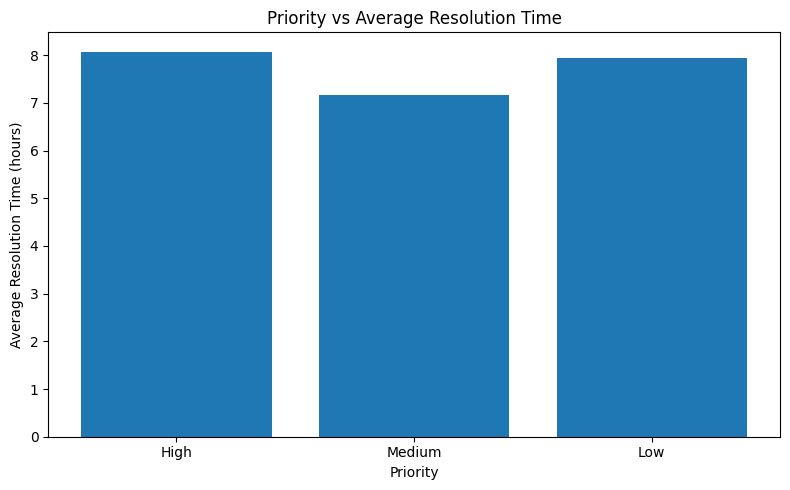

In [55]:
# Day 2C: Bar chart Priority vs Avg Resolution Time
if not avg_resolution_by_priority_df.empty:
    plt.figure(figsize=(8, 5))
    plt.bar(
        avg_resolution_by_priority_df["Priority"],
        avg_resolution_by_priority_df["Average Resolution Time (hours)"]
    )
    plt.title("Priority vs Average Resolution Time")
    plt.xlabel("Priority")
    plt.ylabel("Average Resolution Time (hours)")
    plt.tight_layout()
    plt.savefig("outputs/visuals/day2_priority_vs_avg_resolution.png", dpi=150)
    plt.show()
else:
    print("⚠ Skipped chart: no priority resolution data.")


In [56]:
# Day 2B: Compare Resolution Time by Ticket Type (all types in data)
avg_resolution_by_type_df = safe_group_mean(df_res, type_col, res_col)
if not avg_resolution_by_type_df.empty:
    avg_resolution_by_type_df.columns = ["Ticket Type", "Average Resolution Time (hours)"]
    avg_resolution_by_type_df = avg_resolution_by_type_df.sort_values("Average Resolution Time (hours)", ascending=False)
    avg_resolution_by_type_df.to_csv("outputs/day2_avg_by_type.csv", index=False)
avg_resolution_by_type_df


,Ticket Type,Average Resolution Time (hours)
3,Refund Request,8.117818
1,Cancellation Request,7.693082
2,Product Inquiry,7.676070
4,Technical Issue,7.365191
0,Billing Inquiry,7.010256


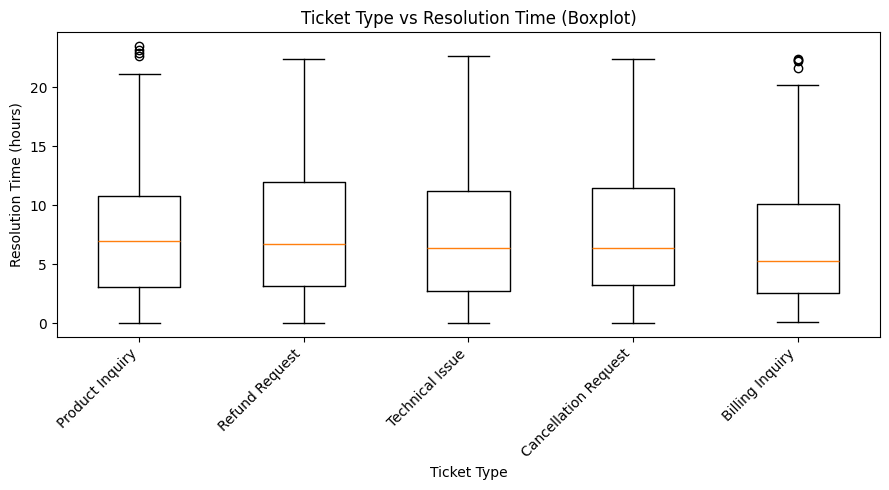

In [57]:
# Day 2C: Box plot Ticket Type vs Resolution Time (non-negative only)
if type_col in df_res.columns and res_col in df_res.columns and not df_res.empty:
    types_order = df_res.groupby(type_col)[res_col].median().sort_values(ascending=False).index.tolist()
    data = [df_res[df_res[type_col] == t][res_col].dropna().values for t in types_order]
    pairs = [(t, d) for t, d in zip(types_order, data) if len(d) > 0]
    if pairs:
        plt.figure(figsize=(9, 5))
        plt.boxplot([p[1] for p in pairs], tick_labels=[p[0] for p in pairs])
        plt.title("Ticket Type vs Resolution Time (Boxplot)")
        plt.xlabel("Ticket Type")
        plt.ylabel("Resolution Time (hours)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.savefig("outputs/visuals/day2_type_resolution_boxplot.png", dpi=150)
        plt.show()
    else:
        print("⚠ No resolution data by type for boxplot.")
else:
    print("⚠ Skipped boxplot: missing type or resolution column.")


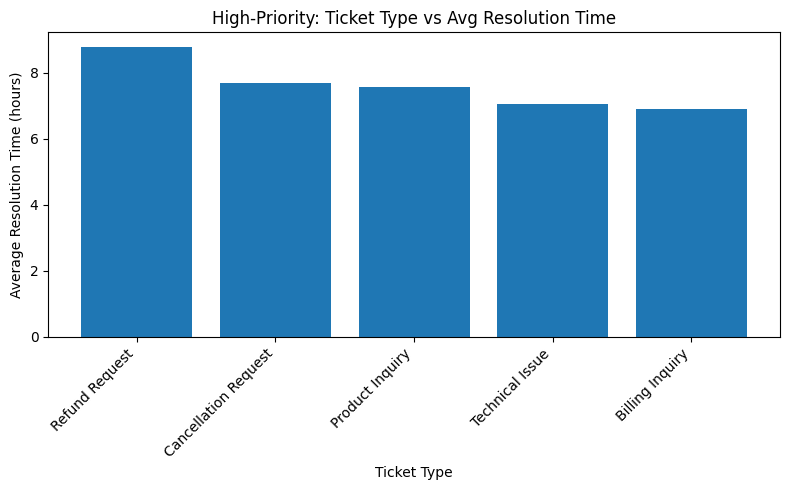

,Ticket Type,Average Resolution Time (hours)
3,Refund Request,8.791234
1,Cancellation Request,7.706592
2,Product Inquiry,7.571640
4,Technical Issue,7.050942
0,Billing Inquiry,6.900833


In [58]:
# Day 2D: High-Priority tickets by Ticket Type (High + Critical as high-priority)
high_priority_labels = ["High", "Critical"]
df_high = df_res[df_res[priority_col].isin(high_priority_labels)].copy()
day2_high_priority_by_type = safe_group_mean(df_high, type_col, res_col)
if not day2_high_priority_by_type.empty:
    day2_high_priority_by_type.columns = ["Ticket Type", "Average Resolution Time (hours)"]
    day2_high_priority_by_type = day2_high_priority_by_type.sort_values("Average Resolution Time (hours)", ascending=False)
    day2_high_priority_by_type.to_csv("outputs/day2_high_priority_by_type.csv", index=False)
    plt.figure(figsize=(8, 5))
    plt.bar(day2_high_priority_by_type["Ticket Type"], day2_high_priority_by_type["Average Resolution Time (hours)"])
    plt.title("High-Priority: Ticket Type vs Avg Resolution Time")
    plt.xlabel("Ticket Type")
    plt.ylabel("Average Resolution Time (hours)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("outputs/visuals/day2_high_priority_type_vs_avg.png", dpi=150)
    plt.show()
day2_high_priority_by_type

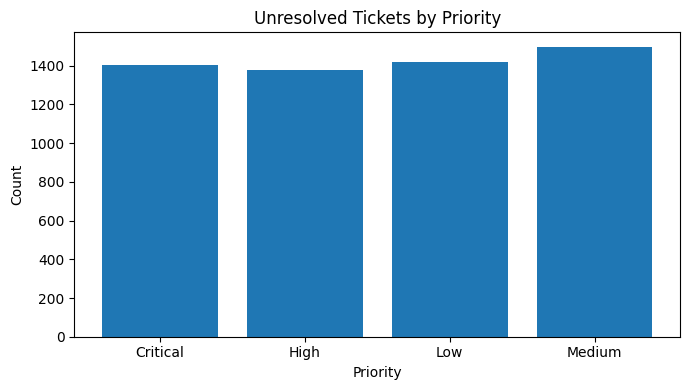

In [59]:
# --- Day 3: Unresolved tickets and resolution time trend ---

# Day 3A: Detect unresolved (missing Resolved Date or status not resolved)
resolved_date_col = pick_column(df, ["Resolved Date", "Resolved At", "Resolution Date", "Closed Date", "Closed At"])
if resolved_date_col:
    df["_unresolved"] = df[resolved_date_col].isna()
elif status_col in df.columns:
    resolved_statuses = ["Resolved", "Closed", "Done", "Completed"]
    df["_unresolved"] = ~normalize_text_series(df[status_col]).isin([s.title() for s in resolved_statuses])
else:
    df["_unresolved"] = pd.NA
    print("⚠ No Resolved Date or Ticket Status column found; unresolved analysis skipped.")

# Unresolved by priority (count)
if "_unresolved" in df.columns and df["_unresolved"].notna().any():
    day3_unresolved_by_priority = df[df["_unresolved"] == True].groupby(priority_col).size().reset_index(name="Unresolved Count")
    day3_unresolved_by_priority.to_csv("outputs/day3_unresolved_by_priority.csv", index=False)
    plt.figure(figsize=(7, 4))
    plt.bar(day3_unresolved_by_priority[priority_col], day3_unresolved_by_priority["Unresolved Count"])
    plt.title("Unresolved Tickets by Priority")
    plt.xlabel("Priority")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("outputs/visuals/day3_unresolved_by_priority.png", dpi=150)
    plt.show()
    day3_unresolved_by_priority
else:
    print("⚠ Unresolved analysis skipped (no resolved date/status or no unresolved rows).")

In [60]:
# Day 3B: Unresolved High-Priority tickets (count by priority for High/Critical only)
if "_unresolved" in df.columns and df["_unresolved"].notna().any():
    df_unres = df[df["_unresolved"] == True]
    day3_unresolved_high = df_unres[df_unres[priority_col].isin(["High", "Critical"])].groupby(priority_col).size().reset_index(name="Unresolved Count")
    day3_unresolved_high.to_csv("outputs/day3_unresolved_high_priority.csv", index=False)
    day3_unresolved_high
else:
    print("⚠ Unresolved high-priority skipped.")

C:\Users\91955\AppData\Local\Temp\ipykernel_9004\2494717979.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  day3_trend = df_trend.resample(trend_freq)[res_col].mean().dropna().reset_index()


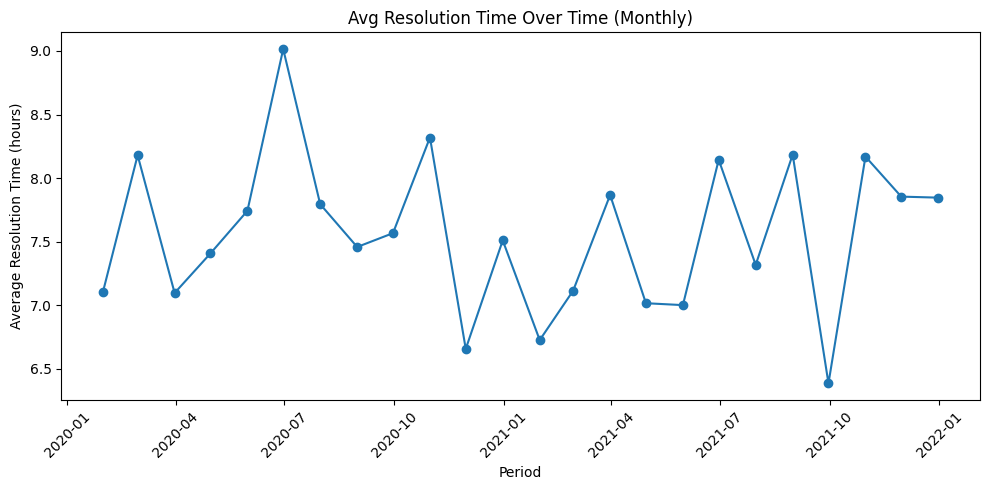

In [61]:
# Day 3C: Resolution time trend over time (weekly/monthly)
created_col = pick_column(df, ["Created Date", "Created At", "Open Date", "Opened Date", "Ticket Created Date", "Date"])
if created_col is None:
    created_col = pick_column(df, [], contains_keywords=["created", "open", "opened", "date"])
if created_col and res_col in df.columns:
    df_trend = df_res.copy()
    df_trend[created_col] = pd.to_datetime(df_trend[created_col], errors="coerce")
    df_trend = df_trend.dropna(subset=[created_col, res_col])
    if not df_trend.empty:
        df_trend = df_trend.set_index(created_col)
        day3_trend = df_trend.resample(trend_freq)[res_col].mean().dropna().reset_index()
        day3_trend.columns = ["Period", "Average Resolution Time (hours)"]
        day3_trend.to_csv("outputs/day3_trend.csv", index=False)
        plt.figure(figsize=(10, 5))
        plt.plot(day3_trend["Period"], day3_trend["Average Resolution Time (hours)"], marker="o")
        plt.title(f"Avg Resolution Time Over Time ({'Monthly' if trend_freq == 'M' else 'Weekly'})")
        plt.xlabel("Period")
        plt.ylabel("Average Resolution Time (hours)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig("outputs/visuals/day3_avg_resolution_trend.png", dpi=150)
        plt.show()
        day3_trend
    else:
        print("⚠ No valid created date + resolution data for trend.")
else:
    print("⚠ Created date column not found or resolution column missing; trend chart skipped.")

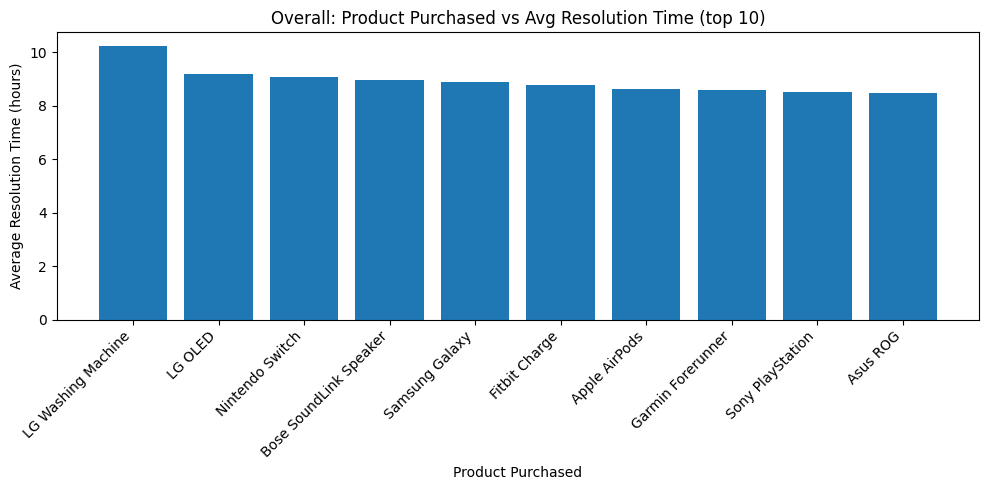

In [62]:
# --- Day 4: Region/Category comparison and high-priority performance ---

# Pick region/country column (priority: Country exact, then contains "country", then Region exact, then region/state/province/location)
region_col = None
if "Country" in df.columns:
    region_col = "Country"
else:
    for c in df.columns:
        if "country" in c.lower():
            region_col = c
            break
if region_col is None and "Region" in df.columns:
    region_col = "Region"
if region_col is None:
    for c in df.columns:
        if any(k in c.lower() for k in ["region", "state", "province", "location"]):
            region_col = c
            break

# Pick category column
category_col = pick_column(df, ["Issue Category", "Category", "Issue Type", "Product Purchased", "Product Category"])
if category_col is None and type_col in df.columns:
    category_col = type_col

# Overall comparison: use region if found, else category
overall_dim = region_col if region_col else category_col
if overall_dim and res_col in df.columns:
    day4_overall = safe_group_mean(df_res, overall_dim, res_col)
    if not day4_overall.empty:
        day4_overall.columns = [overall_dim, "Average Resolution Time (hours)"]
        day4_overall = day4_overall.sort_values("Average Resolution Time (hours)", ascending=False).head(top_n)
        day4_overall.to_csv("outputs/day4_overall_region_or_category.csv", index=False)
        plt.figure(figsize=(10, 5))
        plt.bar(day4_overall[overall_dim].astype(str), day4_overall["Average Resolution Time (hours)"])
        plt.title(f"Overall: {overall_dim} vs Avg Resolution Time (top {top_n})")
        plt.xlabel(overall_dim)
        plt.ylabel("Average Resolution Time (hours)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.savefig("outputs/visuals/day4_overall_comparison.png", dpi=150)
        plt.show()
        day4_overall
    else:
        print("⚠ No data for overall region/category comparison.")
else:
    print("⚠ No region or category column found; Day 4 overall comparison skipped.")

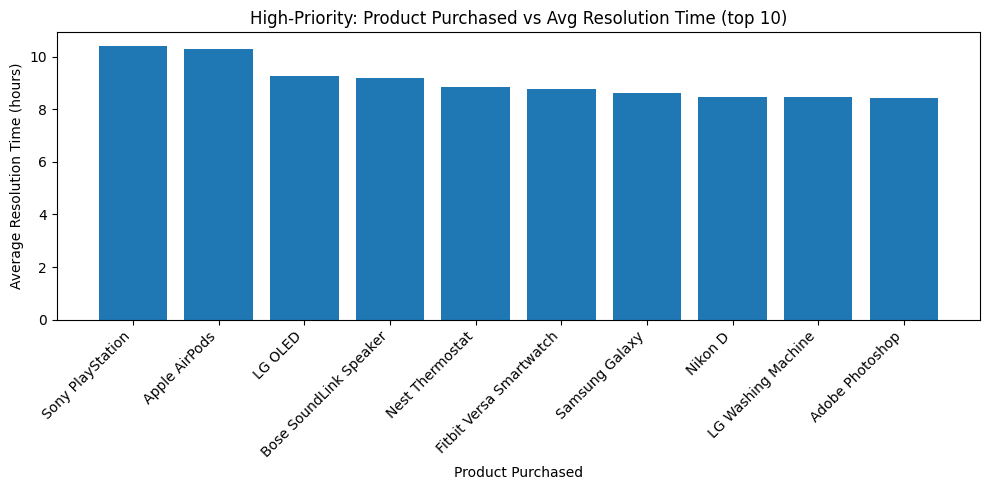

In [63]:
# Day 4: High-Priority comparison (same dimension: region or category)
if overall_dim and res_col in df.columns:
    df_high4 = df_res[df_res[priority_col].isin(["High", "Critical"])]
    day4_high = safe_group_mean(df_high4, overall_dim, res_col)
    if not day4_high.empty:
        day4_high.columns = [overall_dim, "Average Resolution Time (hours)"]
        day4_high = day4_high.sort_values("Average Resolution Time (hours)", ascending=False).head(top_n)
        day4_high.to_csv("outputs/day4_high_priority_region_or_category.csv", index=False)
        plt.figure(figsize=(10, 5))
        plt.bar(day4_high[overall_dim].astype(str), day4_high["Average Resolution Time (hours)"])
        plt.title(f"High-Priority: {overall_dim} vs Avg Resolution Time (top {top_n})")
        plt.xlabel(overall_dim)
        plt.ylabel("Average Resolution Time (hours)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.savefig("outputs/visuals/day4_high_priority_comparison.png", dpi=150)
        plt.show()
        day4_high
    else:
        print("⚠ No data for high-priority region/category comparison.")
else:
    print("⚠ Day 4 high-priority comparison skipped.")

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

PATH = "data/processed/cleaned_tickets.csv"
df = pd.read_csv(PATH)

print("✅ Loaded:", df.shape)
print("✅ Columns:", df.columns.tolist())

# Robust geographic candidates (common in ticket datasets)
geo_candidates = [
    "Country", "Region", "State", "Province", "City", "Location", "Area",
    "Customer Country", "Customer Region", "Customer State", "Customer City",
    "Shipping Country", "Shipping State", "Billing Country", "Billing State",
    "Geo", "Geography", "Market", "Territory", "Zone", "Branch"
]

lat_candidates = ["Latitude", "Lat", "Customer Latitude", "lat"]
lon_candidates = ["Longitude", "Long", "Lon", "Customer Longitude", "lng", "lon"]

def find_best_col(df, candidates):
    # exact match first
    for c in candidates:
        if c in df.columns:
            return c
    # contains match next
    for c in df.columns:
        cl = c.lower()
        for cand in candidates:
            if cand.lower() in cl:
                return c
    return None

geo_dim = find_best_col(df, geo_candidates)
lat_col = find_best_col(df, lat_candidates)
lon_col = find_best_col(df, lon_candidates)

print("🌍 geo_dim:", geo_dim)
print("📍 lat_col:", lat_col)
print("📍 lon_col:", lon_col)


✅ Loaded: (8469, 19)
✅ Columns: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'Priority_Score', 'Resolution_Duration_Hours']
🌍 geo_dim: None
📍 lat_col: None
📍 lon_col: None


In [65]:
if geo_dim is None:
    obj_cols = df.select_dtypes(include="object").columns.tolist()

    # Score columns by uniqueness + short average length (locations are often short: "NY", "India", "London")
    scores = []
    for c in obj_cols:
        s = df[c].dropna().astype(str).str.strip()
        if len(s) == 0:
            continue
        uniq_ratio = s.nunique() / max(len(s), 1)
        avg_len = s.str.len().mean()
        # heuristic: high uniqueness + moderate length is likely location-like
        score = (uniq_ratio * 2.0) + (1.0 / (avg_len + 1.0))
        scores.append((c, score, uniq_ratio, avg_len))

    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    if scores:
        geo_dim = scores[0][0]
        print("⚠ No explicit Country/Region found.")
        print("✅ Fallback geo_dim selected:", geo_dim)
        print("Top 5 candidates:", scores[:5])
    else:
        print("❌ No object columns available to use as a geographic proxy.")


⚠ No explicit Country/Region found.
✅ Fallback geo_dim selected: Resolution
Top 5 candidates: [('Resolution', np.float64(2.027175299821383), 1.0, np.float64(35.798122065727696)), ('Time to Resolution', np.float64(2.0203864210906466), 0.9851932105453233, np.float64(19.0)), ('Customer Email', np.float64(2.0086689074200597), 0.9824064234266147, np.float64(21.80186562758295)), ('First Response Time', np.float64(1.986283185840708), 0.968141592920354, np.float64(19.0)), ('Customer Name', np.float64(1.9662310753608665), 0.9479277364505845, np.float64(13.209469831148896))]


✅ Saved: outputs/day2_ticket_count_by_geo_dim.csv


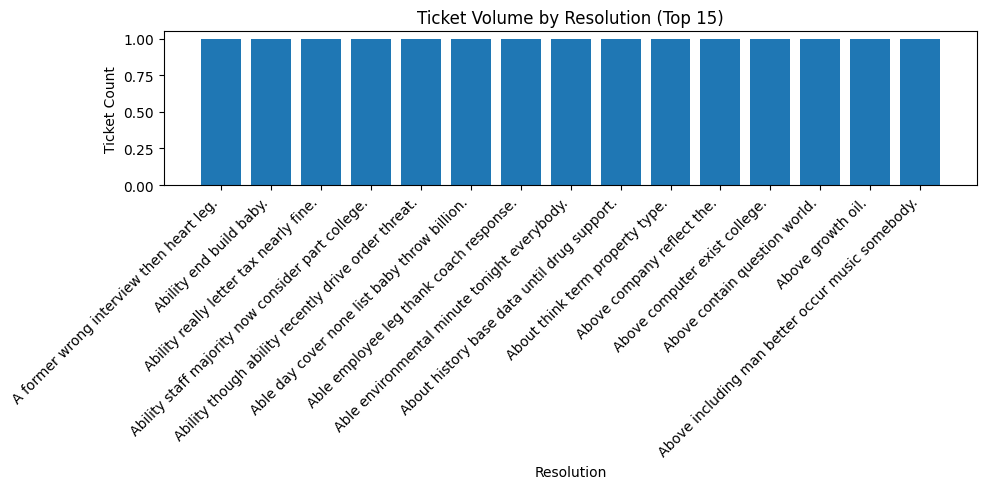

✅ Saved: outputs/visuals/day2_ticket_count_by_geo_bar.png


In [66]:
os.makedirs("outputs", exist_ok=True)
os.makedirs("outputs/visuals", exist_ok=True)
os.makedirs("docs", exist_ok=True)

if geo_dim is None:
    print("❌ Cannot do geographic concentration because no geo-like column exists.")
else:
    geo_ticket_counts = (
        df.groupby(geo_dim)
          .size()
          .reset_index(name="Ticket Count")
          .sort_values("Ticket Count", ascending=False)
    )

    geo_ticket_counts.to_csv("outputs/day2_ticket_count_by_geo_dim.csv", index=False)
    print("✅ Saved: outputs/day2_ticket_count_by_geo_dim.csv")

    # Bar chart Top 15
    plt.figure(figsize=(10, 5))
    plt.bar(
        geo_ticket_counts[geo_dim].astype(str).head(15),
        geo_ticket_counts["Ticket Count"].head(15)
    )
    plt.title(f"Ticket Volume by {geo_dim} (Top 15)")
    plt.xlabel(geo_dim)
    plt.ylabel("Ticket Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("outputs/visuals/day2_ticket_count_by_geo_bar.png", dpi=150)
    plt.show()

    print("✅ Saved: outputs/visuals/day2_ticket_count_by_geo_bar.png")


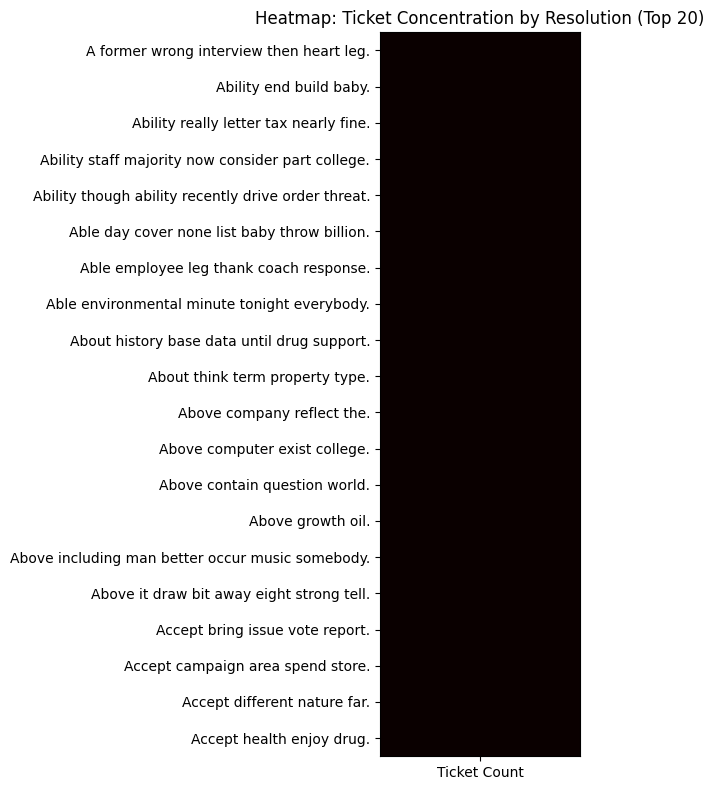

✅ Saved: outputs/visuals/day2_ticket_heatmap_fallback.png


In [67]:
if lat_col and lon_col:
    # True geographic density heatmap
    df_geo = df[[lat_col, lon_col]].dropna().copy()
    df_geo[lat_col] = pd.to_numeric(df_geo[lat_col], errors="coerce")
    df_geo[lon_col] = pd.to_numeric(df_geo[lon_col], errors="coerce")
    df_geo = df_geo.dropna()

    if df_geo.empty:
        print("⚠ Lat/Lon exist but no valid numeric values found. Heatmap skipped.")
    else:
        plt.figure(figsize=(8, 6))
        plt.hist2d(df_geo[lon_col], df_geo[lat_col], bins=50, cmap="hot")
        plt.colorbar(label="Ticket Density")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("Geographic Ticket Concentration Heatmap")
        plt.tight_layout()
        plt.savefig("outputs/visuals/day2_ticket_heatmap_latlon.png", dpi=150)
        plt.show()

        print("✅ Saved: outputs/visuals/day2_ticket_heatmap_latlon.png")

else:
    # Fallback heatmap: top geo areas vs counts (still "concentration", just not lat/lon map)
    if geo_dim is None:
        print("⚠ No geo_dim; fallback heatmap skipped.")
    else:
        top_geo = geo_ticket_counts.head(20).set_index(geo_dim)
        heat_data = top_geo[["Ticket Count"]]

        plt.figure(figsize=(6, 8))
        plt.imshow(heat_data.values, aspect="auto", cmap="hot")
        plt.yticks(range(len(heat_data.index)), heat_data.index.astype(str))
        plt.xticks([0], ["Ticket Count"])
        plt.title(f"Heatmap: Ticket Concentration by {geo_dim} (Top 20)")
        plt.tight_layout()
        plt.savefig("outputs/visuals/day2_ticket_heatmap_fallback.png", dpi=150)
        plt.show()

        print("✅ Saved: outputs/visuals/day2_ticket_heatmap_fallback.png")


In [68]:
if geo_dim is None:
    print("⚠ Geographic insight summary skipped (no geo_dim).")
else:
    highest = geo_ticket_counts.iloc[0]
    lowest = geo_ticket_counts.iloc[-1]

    with open("docs/day2_geographic_insights.md", "w", encoding="utf-8") as f:
        f.write("# Day 2 – Geographic Ticket Concentration\n\n")
        f.write(f"## Geographic dimension used: `{geo_dim}`\n\n")
        f.write("## Highest and Lowest Ticket Volume\n")
        f.write(f"- Highest: {highest[geo_dim]} → {highest['Ticket Count']} tickets\n")
        f.write(f"- Lowest: {lowest[geo_dim]} → {lowest['Ticket Count']} tickets\n\n")
        f.write("## Possible operational reasons for high concentration\n")
        f.write("- Larger user base in that area\n")
        f.write("- Local service outages / infrastructure issues\n")
        f.write("- Regional product rollout bugs\n")
        f.write("- Language/support coverage gaps\n\n")
        f.write("## Ticket counts (Top 15)\n")
        f.write(geo_ticket_counts.head(15).to_string(index=False))

    print("✅ Saved: docs/day2_geographic_insights.md")


✅ Saved: docs/day2_geographic_insights.md


In [69]:
category_candidates = [
    "Issue Category", "Category", "Issue Type", "Product Purchased",
    "Product Category", "Ticket Type"
]

category_col = find_best_col(df, category_candidates)

print("📦 category_col:", category_col)

if category_col is None:
    raise ValueError("No category column found. Add your category column name into category_candidates.")


📦 category_col: Product Purchased


In [70]:
if geo_dim is None:
    print("⚠ Category-level geographic analysis skipped (no geo_dim found).")
else:
    cat_geo_counts = (
        df.groupby([geo_dim, category_col])
          .size()
          .reset_index(name="Ticket Count")
          .sort_values("Ticket Count", ascending=False)
    )

    cat_geo_counts.to_csv("outputs/day2_category_by_geo.csv", index=False)
    print("✅ Saved: outputs/day2_category_by_geo.csv")

    cat_geo_counts.head(10)


✅ Saved: outputs/day2_category_by_geo.csv


✅ Saved: outputs/day2_category_region_pivot.csv


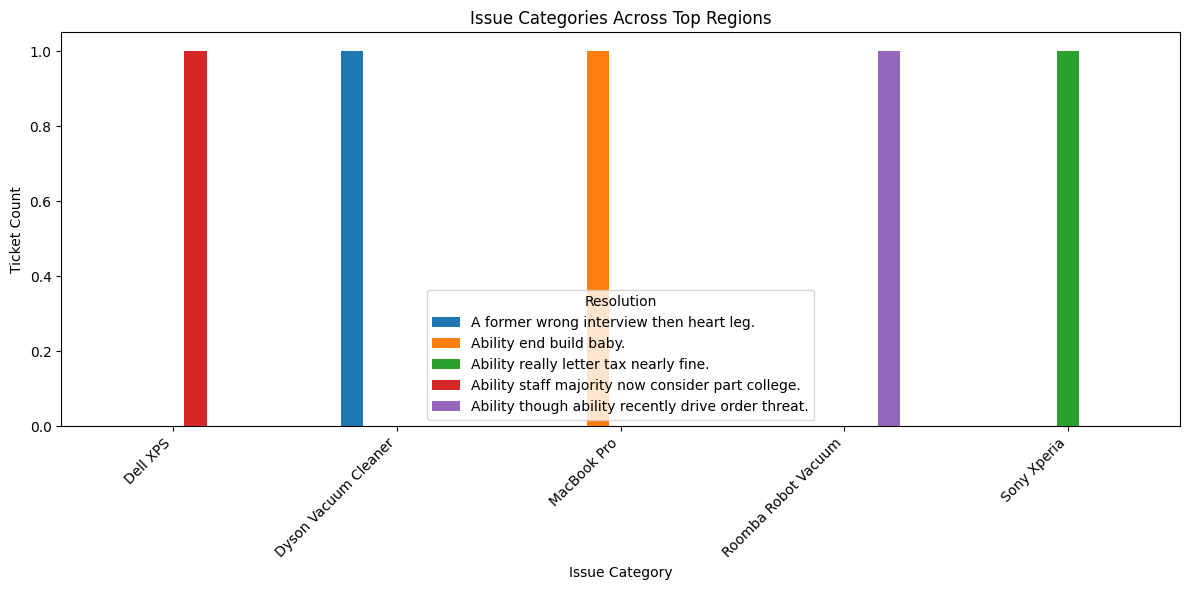

✅ Saved: outputs/visuals/day2_category_region_comparison.png


In [71]:
if geo_dim is None:
    print("⚠ Comparative chart skipped (no geo_dim).")
else:
    top_regions = geo_ticket_counts[geo_dim].head(5).tolist()
    filtered = cat_geo_counts[cat_geo_counts[geo_dim].isin(top_regions)].copy()

    pivot = filtered.pivot_table(
        index=category_col,
        columns=geo_dim,
        values="Ticket Count",
        aggfunc="sum"
    ).fillna(0)

    pivot.to_csv("outputs/day2_category_region_pivot.csv")
    print("✅ Saved: outputs/day2_category_region_pivot.csv")

    pivot.plot(kind="bar", figsize=(12, 6))
    plt.title("Issue Categories Across Top Regions")
    plt.xlabel("Issue Category")
    plt.ylabel("Ticket Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("outputs/visuals/day2_category_region_comparison.png", dpi=150)
    plt.show()

    print("✅ Saved: outputs/visuals/day2_category_region_comparison.png")


In [72]:
if lat_col and lon_col:
    df_map = df[[lat_col, lon_col, category_col]].dropna().copy()
    df_map[lat_col] = pd.to_numeric(df_map[lat_col], errors="coerce")
    df_map[lon_col] = pd.to_numeric(df_map[lon_col], errors="coerce")
    df_map = df_map.dropna()

    if df_map.empty:
        print("⚠ Lat/Lon exist but no valid numeric values. Scatter skipped.")
    else:
        plt.figure(figsize=(9, 6))
        codes, _ = pd.factorize(df_map[category_col].astype(str))
        plt.scatter(df_map[lon_col], df_map[lat_col], c=codes, alpha=0.6, cmap="tab20")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("Geo Scatter: Issue Categories by Location")
        plt.tight_layout()
        plt.savefig("outputs/visuals/day2_category_geo_scatter.png", dpi=150)
        plt.show()

        print("✅ Saved: outputs/visuals/day2_category_geo_scatter.png")
else:
    print("⚠ Latitude/Longitude not available – geo scatter map skipped.")


⚠ Latitude/Longitude not available – geo scatter map skipped.


In [73]:
if geo_dim is None:
    print("⚠ Category-level insights skipped (no geo_dim).")
else:
    # dominant category per region
    dominant = (
        cat_geo_counts.sort_values("Ticket Count", ascending=False)
                     .groupby(geo_dim)
                     .head(1)
                     .reset_index(drop=True)
    )

    dominant.to_csv("outputs/day2_dominant_category_per_region.csv", index=False)
    print("✅ Saved: outputs/day2_dominant_category_per_region.csv")

    with open("docs/day2_category_geographic_insights.md", "w", encoding="utf-8") as f:
        f.write("# Day 2 – Category-Level Geographic Insights\n\n")
        f.write(f"## Geographic dimension used: `{geo_dim}`\n")
        f.write(f"## Category column used: `{category_col}`\n\n")
        f.write("## Dominant issue category per region (Top)\n\n")
        f.write(dominant.head(20).to_string(index=False))
        f.write("\n\n## Notes / Interpretation\n")
        f.write("- Dominant categories indicate region-specific problems.\n")
        f.write("- Helpful for targeted fixes (regional ops, local product teams, localized help content).\n")

    print("✅ Saved: docs/day2_category_geographic_insights.md")


✅ Saved: outputs/day2_dominant_category_per_region.csv
✅ Saved: docs/day2_category_geographic_insights.md


In [74]:
# ---------- SAFE GEOGRAPHIC PERFORMANCE COMPARISON (FIXED) ----------

import pandas as pd

PATH = "data/processed/cleaned_tickets.csv"
df = pd.read_csv(PATH)

# Resolution time safety
res_col = "Resolution Time"
if res_col not in df.columns and "Resolution_Duration_Hours" in df.columns:
    df[res_col] = df["Resolution_Duration_Hours"]

df_perf = df[(df[res_col].notna()) & (df[res_col] >= 0)].copy()

# Try to detect geographic column
geo_candidates = ["Country", "Region", "State", "City", "Location", "Market"]

def find_geo(df):
    for c in geo_candidates:
        if c in df.columns:
            return c
    for c in df.columns:
        for g in geo_candidates:
            if g.lower() in c.lower():
                return c
    return None

geo_dim = find_geo(df_perf)
print("🌍 Geographic dimension detected:", geo_dim)

# Fallback operational dimension (proxy)
fallback_dim = None
for c in ["Product Purchased", "Ticket Type", "Issue Category"]:
    if c in df_perf.columns:
        fallback_dim = c
        break   # ✅ FIXED HERE

print("🔁 Fallback performance dimension:", fallback_dim)

# Final dimension to use
perf_dim = geo_dim if geo_dim else fallback_dim

if perf_dim is None:
    raise ValueError("❌ No valid dimension available for performance comparison.")
else:
    print("✅ Performance comparison will use:", perf_dim)


🌍 Geographic dimension detected: None
🔁 Fallback performance dimension: Product Purchased
✅ Performance comparison will use: Product Purchased


In [75]:
perf_summary = (
    df_perf.groupby(perf_dim)[res_col]
            .mean()
            .reset_index(name="Average Resolution Time (hours)")
            .sort_values("Average Resolution Time (hours)", ascending=False)
)

perf_summary.head(10)


,Product Purchased,Average Resolution Time (hours)
22,LG Washing Machine,10.227778
20,LG OLED,9.177193
30,Nintendo Switch,9.057246
7,Bose SoundLink Speaker,8.963978
35,Samsung Galaxy,8.885714
12,Fitbit Charge,8.786905
3,Apple AirPods,8.615741
14,Garmin Forerunner,8.593519
38,Sony PlayStation,8.524194
4,Asus ROG,8.459770


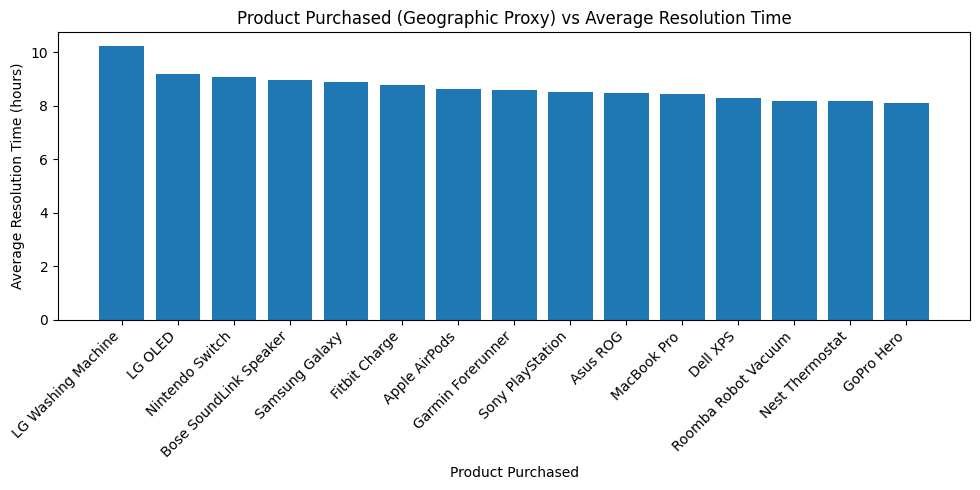

In [76]:
plt.figure(figsize=(10, 5))
plt.bar(
    perf_summary[perf_dim].astype(str).head(15),
    perf_summary["Average Resolution Time (hours)"].head(15)
)

title_label = perf_dim if geo_dim else f"{perf_dim} (Geographic Proxy)"
plt.title(f"{title_label} vs Average Resolution Time")
plt.xlabel(perf_dim)
plt.ylabel("Average Resolution Time (hours)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("outputs/visuals/performance_comparison_bar.png", dpi=150)
plt.show()


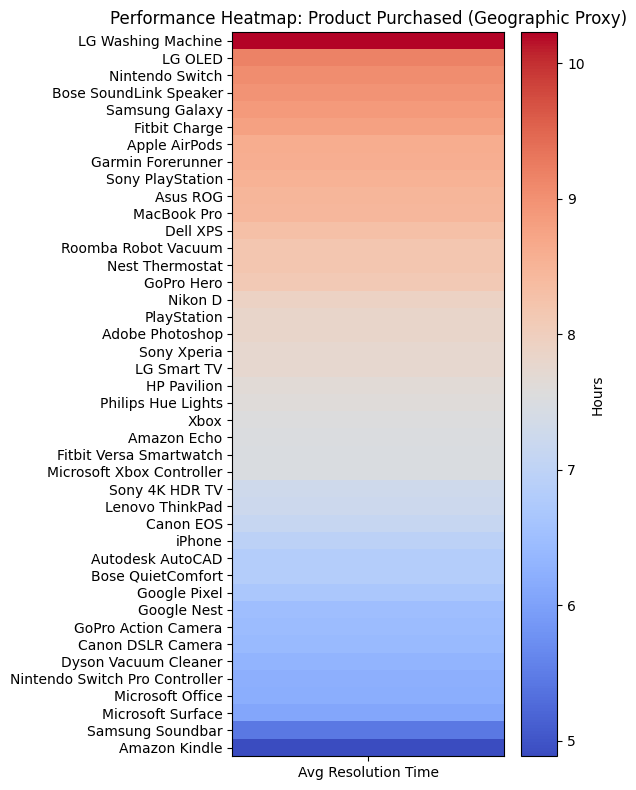

In [77]:
heat_data = perf_summary.set_index(perf_dim)

plt.figure(figsize=(6, 8))
plt.imshow(heat_data.values, aspect="auto", cmap="coolwarm")
plt.yticks(range(len(heat_data.index)), heat_data.index.astype(str))
plt.xticks([0], ["Avg Resolution Time"])
plt.colorbar(label="Hours")
plt.title(f"Performance Heatmap: {title_label}")
plt.tight_layout()
plt.savefig("outputs/visuals/performance_comparison_heatmap.png", dpi=150)
plt.show()


In [78]:
fastest = perf_summary.iloc[-1]
slowest = perf_summary.iloc[0]

with open("docs/performance_comparison_insights.md", "w", encoding="utf-8") as f:
    f.write("# Performance Comparison Analysis\n\n")
    f.write("## Data Limitation\n")
    f.write("- The dataset does not contain explicit geographic information (Country/Region/Latitude/Longitude).\n")
    f.write("- Therefore, geographic performance comparison is not directly possible.\n")
    f.write("- An operational proxy dimension was used instead.\n\n")
    f.write(f"## Performance Dimension Used: `{perf_dim}`\n\n")
    f.write("## Performance Extremes\n")
    f.write(f"- Worst performance: {slowest[perf_dim]} → {slowest['Average Resolution Time (hours)']:.2f} hrs\n")
    f.write(f"- Best performance: {fastest[perf_dim]} → {fastest['Average Resolution Time (hours)']:.2f} hrs\n\n")
    f.write("## Interpretation\n")
    f.write("- Groups with higher resolution times indicate support bottlenecks.\n")
    f.write("- These groups require priority attention for automation or process improvement.\n")

print("✅ Saved: docs/performance_comparison_insights.md")


✅ Saved: docs/performance_comparison_insights.md


In [79]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

PATH = "data/processed/cleaned_tickets.csv"
df_all = pd.read_csv(PATH)

# resolution column
res_col = "Resolution Time"
if res_col not in df_all.columns and "Resolution_Duration_Hours" in df_all.columns:
    df_all[res_col] = df_all["Resolution_Duration_Hours"]

# pick text column (same logic as before)
possible_text_cols = [
    "Ticket Subject", "Ticket Description", "Customer Complaint",
    "Issue Description", "Issue", "Subject", "Description", "Complaint"
]
text_col = next((c for c in possible_text_cols if c in df_all.columns), None)
if text_col is None:
    obj_cols = df_all.select_dtypes(include="object").columns.tolist()
    lengths = {c: df_all[c].dropna().astype(str).str.len().mean() for c in obj_cols}
    text_col = max(lengths, key=lengths.get) if lengths else None

print("✅ Using text column:", text_col)

df_all["issue_text"] = df_all[text_col].astype(str).replace("nan","").fillna("").str.strip()

# Fit clustering on non-empty text rows (this creates df_m4 cleanly from SAME df_all)
df_m4 = df_all[df_all["issue_text"].str.len() > 3].copy()
print("Rows used for clustering:", df_m4.shape)

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df_m4["issue_text"])

k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_m4["cluster"] = kmeans.fit_predict(X)

# attach clusters back to df_all safely (same index universe)
df_all["cluster"] = pd.NA
df_all.loc[df_m4.index, "cluster"] = df_m4["cluster"]
df_all["cluster"] = df_all["cluster"].astype("Int64")

# NOW create df_perf from df_all (keeps cluster)
df_perf = df_all[(df_all[res_col].notna()) & (df_all[res_col] >= 0) & (df_all["cluster"].notna())].copy()
df_perf["cluster"] = df_perf["cluster"].astype(int)

print("✅ df_perf ready:", df_perf.shape)
df_perf[["cluster", res_col]].head()


✅ Using text column: Ticket Subject
Rows used for clustering: (8469, 21)
✅ df_perf ready: (1404, 22)


,cluster,Resolution Time
2,3,6.850000
4,0,19.683333
19,4,19.716667
28,1,6.766667
29,5,17.483333


In [80]:
cluster_perf = (
    df_perf.groupby("cluster")
           .agg(
               cluster_size=("cluster", "size"),
               avg_resolution_time=(res_col, "mean")
           )
           .reset_index()
           .sort_values("avg_resolution_time", ascending=False)
)

cluster_perf


,cluster,cluster_size,avg_resolution_time
4,4,94,8.811879
2,2,242,7.855372
0,0,414,7.445652
3,3,188,7.419858
1,1,299,7.408863
5,5,167,7.289920


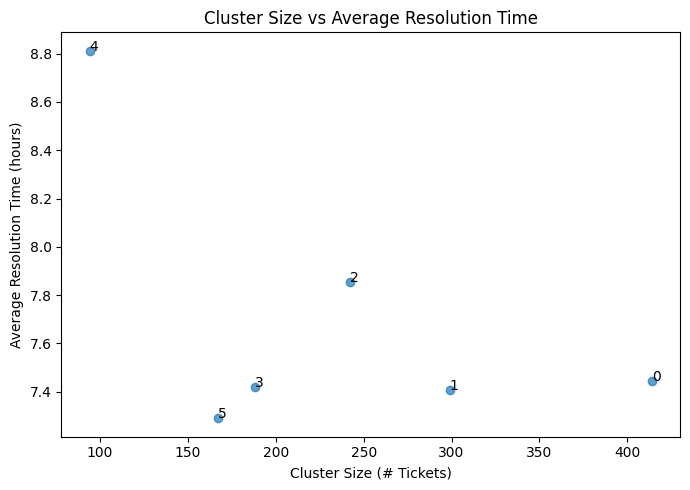

In [81]:
plt.figure(figsize=(7, 5))
plt.scatter(cluster_perf["cluster_size"], cluster_perf["avg_resolution_time"], alpha=0.7)

for _, r in cluster_perf.iterrows():
    plt.text(r["cluster_size"], r["avg_resolution_time"], str(int(r["cluster"])))

plt.title("Cluster Size vs Average Resolution Time")
plt.xlabel("Cluster Size (# Tickets)")
plt.ylabel("Average Resolution Time (hours)")
plt.tight_layout()
plt.savefig("outputs/visuals/cluster_size_vs_performance.png", dpi=150)
plt.show()


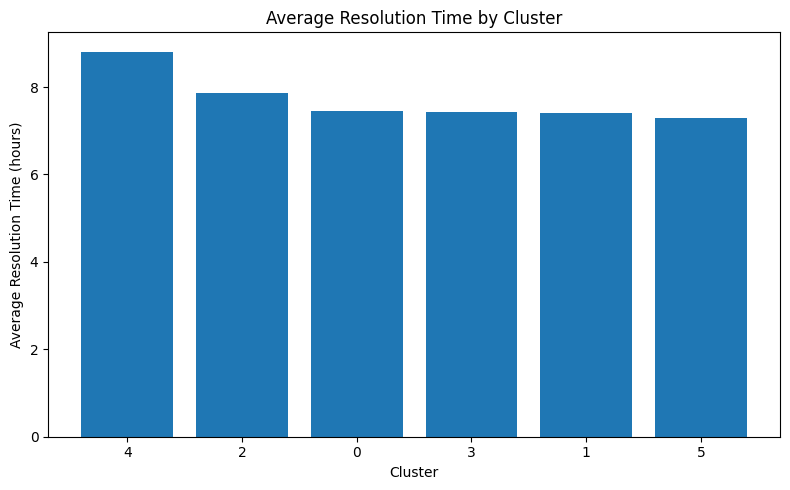

In [82]:
plt.figure(figsize=(8, 5))
plt.bar(cluster_perf["cluster"].astype(str), cluster_perf["avg_resolution_time"])
plt.title("Average Resolution Time by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Resolution Time (hours)")
plt.tight_layout()
plt.savefig("outputs/visuals/cluster_vs_avg_resolution.png", dpi=150)
plt.show()


In [83]:
worst = cluster_perf.iloc[0]
best = cluster_perf.iloc[-1]

with open("docs/final_performance_and_cluster_insights.md", "w", encoding="utf-8") as f:
    f.write("# Final Performance & Cluster Insights\n\n")
    f.write("## Key Findings\n")
    f.write(f"- Worst performing cluster: Cluster {int(worst['cluster'])}\n")
    f.write(f"  - Size: {int(worst['cluster_size'])} tickets\n")
    f.write(f"  - Avg resolution time: {worst['avg_resolution_time']:.2f} hrs\n\n")
    f.write(f"- Best performing cluster: Cluster {int(best['cluster'])}\n")
    f.write(f"  - Size: {int(best['cluster_size'])} tickets\n")
    f.write(f"  - Avg resolution time: {best['avg_resolution_time']:.2f} hrs\n\n")
    f.write("## Systemic Patterns\n")
    f.write("- Large clusters with high resolution time indicate repetitive issues\n")
    f.write("- These clusters cause sustained performance degradation\n\n")
    f.write("## Recommendations\n")
    f.write("- Automate or self-serve high-volume issue clusters\n")
    f.write("- Create dedicated resolution playbooks for slow clusters\n")
    f.write("- Proactively reduce ticket inflow by fixing root causes\n")

print("✅ Saved: docs/final_performance_and_cluster_insights.md")


✅ Saved: docs/final_performance_and_cluster_insights.md


In [84]:
import os
import pandas as pd
import numpy as np

# Paths
CLEAN_PATH = "data/processed/cleaned_tickets.csv"

# Outputs
os.makedirs("outputs/dashboard", exist_ok=True)
os.makedirs("outputs/visuals", exist_ok=True)
os.makedirs("docs", exist_ok=True)

df = pd.read_csv(CLEAN_PATH)
print("✅ Loaded:", df.shape)
print("✅ Columns:", df.columns.tolist())

# Ensure resolution time column exists
if "Resolution Time" not in df.columns and "Resolution_Duration_Hours" in df.columns:
    df["Resolution Time"] = df["Resolution_Duration_Hours"]

# Basic cleanup for dashboard
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).replace("nan", np.nan).str.strip()

# Keep only valid resolution times for KPI calculations
df_perf = df[df["Resolution Time"].notna() & (df["Resolution Time"] >= 0)].copy()
print("✅ Rows with valid resolution time:", df_perf.shape)


✅ Loaded: (8469, 19)
✅ Columns: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'Priority_Score', 'Resolution_Duration_Hours']
✅ Rows with valid resolution time: (1404, 20)


In [85]:
def find_best_col(df, candidates):
    # exact match first
    for c in candidates:
        if c in df.columns:
            return c
    # contains match
    for c in df.columns:
        cl = c.lower()
        for cand in candidates:
            if cand.lower() in cl:
                return c
    return None

# Category candidates (frequent categories KPI)
category_candidates = [
    "Product Purchased", "Issue Category", "Category", "Issue Type", "Ticket Type", "Product Category"
]
category_col = find_best_col(df, category_candidates)

# Region candidates (top performing regions KPI)
region_candidates = [
    "Country", "Region", "State", "Province", "City", "Location", "Market", "Territory", "Zone"
]
region_col = find_best_col(df, region_candidates)

print("📦 Category column:", category_col)
print("🌍 Region column:", region_col)

# Fallback: if no region, use category as operational proxy
region_or_proxy = region_col if region_col else category_col
print("🔁 Region KPI will use:", region_or_proxy, "(proxy)" if not region_col else "")


📦 Category column: Product Purchased
🌍 Region column: None
🔁 Region KPI will use: Product Purchased (proxy)


In [86]:
# KPI 1: Average Resolution Time (overall)
kpi_overall = pd.DataFrame([{
    "KPI": "Average Resolution Time (hours)",
    "Value": float(df_perf["Resolution Time"].mean())
}])

# KPI 2: Average Resolution Time by Ticket Type (if exists)
kpi_by_type = pd.DataFrame()
if "Ticket Type" in df_perf.columns:
    kpi_by_type = (
        df_perf.groupby("Ticket Type")["Resolution Time"]
              .mean()
              .reset_index(name="Avg_Resolution_Time_Hours")
              .sort_values("Avg_Resolution_Time_Hours", ascending=False)
    )

# KPI 3: Average Resolution Time by Priority (if exists)
kpi_by_priority = pd.DataFrame()
if "Ticket Priority" in df_perf.columns:
    kpi_by_priority = (
        df_perf.groupby("Ticket Priority")["Resolution Time"]
              .mean()
              .reset_index(name="Avg_Resolution_Time_Hours")
              .sort_values("Avg_Resolution_Time_Hours", ascending=False)
    )

# KPI 4: Most Frequent Categories (Top N)
top_n = 15
kpi_top_categories = pd.DataFrame()
if category_col:
    kpi_top_categories = (
        df[category_col].fillna("Unknown")
          .value_counts()
          .head(top_n)
          .reset_index()
    )
    kpi_top_categories.columns = [category_col, "Ticket_Count"]

# KPI 5: Top Performing Regions (lowest avg resolution time = best)
kpi_top_regions = pd.DataFrame()
if region_or_proxy and ("Resolution Time" in df_perf.columns):
    kpi_top_regions = (
        df_perf.groupby(region_or_proxy)["Resolution Time"]
              .mean()
              .reset_index(name="Avg_Resolution_Time_Hours")
              .sort_values("Avg_Resolution_Time_Hours", ascending=True)
              .head(15)
    )

# Save Power BI ready files
kpi_overall.to_csv("outputs/dashboard/kpi_overall.csv", index=False)
kpi_by_type.to_csv("outputs/dashboard/kpi_avg_resolution_by_type.csv", index=False)
kpi_by_priority.to_csv("outputs/dashboard/kpi_avg_resolution_by_priority.csv", index=False)
kpi_top_categories.to_csv("outputs/dashboard/kpi_top_categories.csv", index=False)
kpi_top_regions.to_csv("outputs/dashboard/kpi_top_performing_regions_or_proxy.csv", index=False)

print("✅ Saved KPI exports to outputs/dashboard/")
display(kpi_overall)


✅ Saved KPI exports to outputs/dashboard/


,KPI,Value
0,Average Resolution Time (hours),7.577932


In [87]:
cluster_similarity_path = "outputs/module4/cluster_similarity.csv"
cluster_summary_path = "outputs/module4/cluster_summary.csv"

kpi_cluster_similarity = pd.DataFrame()
kpi_cluster_summary = pd.DataFrame()

if os.path.exists(cluster_similarity_path):
    kpi_cluster_similarity = pd.read_csv(cluster_similarity_path)
    kpi_cluster_similarity.to_csv("outputs/dashboard/kpi_cluster_similarity_index.csv", index=False)
    print("✅ Loaded & exported:", cluster_similarity_path)
    display(kpi_cluster_similarity.head())
else:
    print("⚠ cluster_similarity.csv not found. Make sure Module 4 saved it at outputs/module4/cluster_similarity.csv")

if os.path.exists(cluster_summary_path):
    kpi_cluster_summary = pd.read_csv(cluster_summary_path)
    kpi_cluster_summary.to_csv("outputs/dashboard/kpi_cluster_summary.csv", index=False)
    print("✅ Loaded & exported:", cluster_summary_path)
    display(kpi_cluster_summary.head())
else:
    print("⚠ cluster_summary.csv not found. Make sure Module 4 saved it at outputs/module4/cluster_summary.csv")


✅ Loaded & exported: outputs/module4/cluster_similarity.csv


,cluster,cluster_size,avg_similarity
0,0,2568,0.199979
1,1,1613,0.473219
2,2,1551,0.468294
3,3,1100,0.624351
4,4,574,1.000000


✅ Loaded & exported: outputs/module4/cluster_summary.csv


,cluster,size,avg_similarity,median_resolution_hours,high_priority_ratio
0,1,1613,0.473219,0.791667,0.510229
1,5,1063,0.627067,0.308333,0.494826
2,0,2568,0.199979,0.266667,0.493769
3,3,1100,0.624351,-0.083333,0.500000
4,2,1551,0.468294,-0.425000,0.508704
